ejemplos
# New section

In [2]:
import torch
######
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
fashion_train= '/content/drive/MyDrive/SIS420-INTELIGENCIA_ARTIFICIAL/DATASETs/fashion-mnist_train.csv'
data_train = np.loadtxt(fashion_train, skiprows=1, delimiter=',')
 ######
X, Y = data_train[:,1:], data_train[:,0]
 #########
fashin_test = '/content/drive/MyDrive/SIS420-INTELIGENCIA_ARTIFICIAL/DATASETs/fashion-mnist_test.csv'
data_test = np.loadtxt(fashin_test, skiprows=1, delimiter=',')
x_test, y_test =  data_test[:,1:], data_test[:,0]
#######


Mounted at /content/drive


In [4]:

#####
# normalización y split
X_train = X[:] / 255
X_test = x_test[:] / 255
y_train = Y[:].astype(np.int)
y_test = y_test[:].astype(np.int)
#########
D_in, H, D_out = 784, 64, 10

# convertimos datos a tensores y copiamos en gpu
# X_t = torch.from_numpy(X_train).float().cuda()
# Y_t = torch.from_numpy(y_train).long().cuda()
X_t = torch.from_numpy(X_train).float()
Y_t = torch.from_numpy(y_train).long()

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)#.to("cuda")
#############
outputs = model(torch.randn(64, 784))
outputs.shape
#############
# función de pérdida y derivada

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

# def cross_entropy(output, target):
#     logits = output[torch.arange(len(output)), target]
#     loss = - logits + torch.log(torch.sum(torch.exp(output), axis=-1))
#     loss = loss.mean()
#     return loss
###############
from sklearn.metrics import accuracy_score

def evaluate(x):
    model.eval()
    y_pred = model(x)
    y_probas = softmax(y_pred)
    return torch.argmax(y_probas, axis=1)

# y_pred = evaluate(torch.from_numpy(X_test).float().cuda())
y_pred = evaluate(torch.from_numpy(X_test).float())
accuracy_score(y_test, y_pred.cpu().numpy())
###################

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

0.0316


# PREGUNTA 2
Datos de la glándula tiroides. ('normal', hipo e hiperfuncionamiento)

## IMPORTANDO LIBRERIAS

In [12]:
# utilizado para la manipulación de directorios y rutas
import os
# Cálculo científico y vectorial para python
import numpy as np
# Libreria para graficos
from matplotlib import pyplot
# Modulo de optimizacion en scipy
from scipy import optimize
# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline
import pandas as pd
import random

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## LEYENDO DATOS Y MEJORANDOLO

In [13]:
import zipfile
import os


print('Beginning file unzip')

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/SIS420-INTELIGENCIA_ARTIFICIAL/DATASETs/segunda instancia/traffic-signs-data.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()

print('Done')
os.listdir("./")

Beginning file unzip
Done


['.config', 'train.p', 'drive', 'test.p', 'valid.p', 'sample_data']

In [14]:
# cargar datos
import pickle

# TODO: rellene esto en función de dónde guardó los datos de entrenamiento y prueba

training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [15]:
import numpy as np
import pandas as pd

### Reemplace cada signo de interrogación con el valor apropiado. 
### Use Python, pandas o métodos numpy en lugar de codificar los resultados

# TODO: Número de ejemplos de entrenamiento
n_train = X_train.shape[0]

# TODO: Número de ejemplos de validación
n_validation = X_valid.shape[0]

# TODO: Número de ejemplos de validación
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Número de ejemplos de entrenamiento =", n_train)
print("Número de ejemplos de prueba =", n_test)
print("Número de ejemplos de validación =", n_validation)
print("Forma de datos de imagen =", image_shape)
print("Numero de clases=", n_classes)

Número de ejemplos de entrenamiento = 34799
Número de ejemplos de prueba = 12630
Número de ejemplos de validación = 4410
Image data shape = (32, 32, 3)
Number of classes= 43


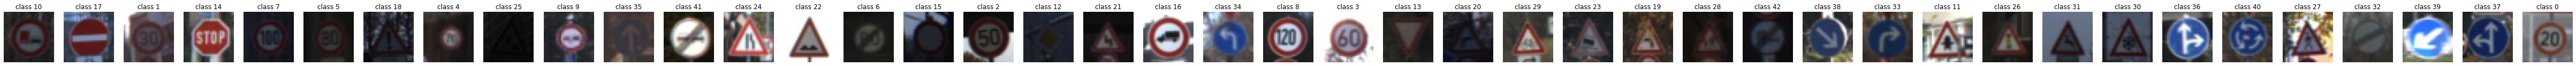

In [16]:
def show_images(images, cols = 1, titles = None):

    assert((titles is None)or (len(images) == len(titles)))
    
    n_images = len(images)
    
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    
    fig = plt.figure(figsize=(2, 2))
    
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        a.grid(False)
        a.axis('off')
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image, cmap='gray')
        a.set_title(title)
    
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
def select_random_images_by_classes(features, labels, n_features):
  
  indexes = []
  _classes = np.unique(labels);
  
  while len(indexes) < len(_classes):
  
    index = random.randint(0, n_features-1)
    _class = labels[index]

    for i in range(0, len(_classes)):

      if _class == _classes[i]:
        _classes[i] = -1
        indexes.append(index)
        break

  images = []
  titles = []

  for i in range(0, len(indexes)):
    images.append(features[indexes[i]])
    titles.append("class " + str(labels[indexes[i]]))

  show_images(images, titles = titles)
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

select_random_images_by_classes(X_train, y_train, n_train)

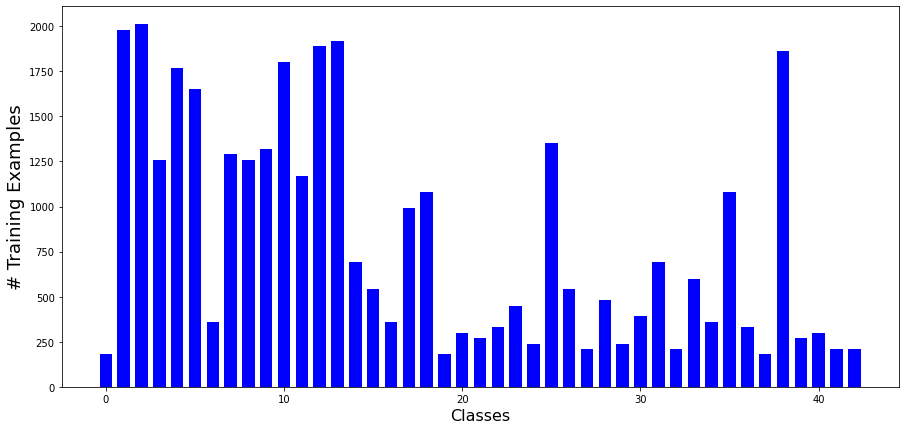

In [6]:
def plot_distribution_chart(x, y, xlabel, ylabel, width, color):
  
  plt.figure(figsize=(15,7))
  plt.ylabel(ylabel, fontsize=18)
  plt.xlabel(xlabel, fontsize=16)
  plt.bar(x, y, width, color=color)
  plt.show()
_classes, counts = np.unique(y_train, return_counts=True)

plot_distribution_chart(_classes, counts, 'Classes', '# Training Examples', 0.7, 'blue')

In [32]:
import cv2

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness_camera_images(img)

    return img

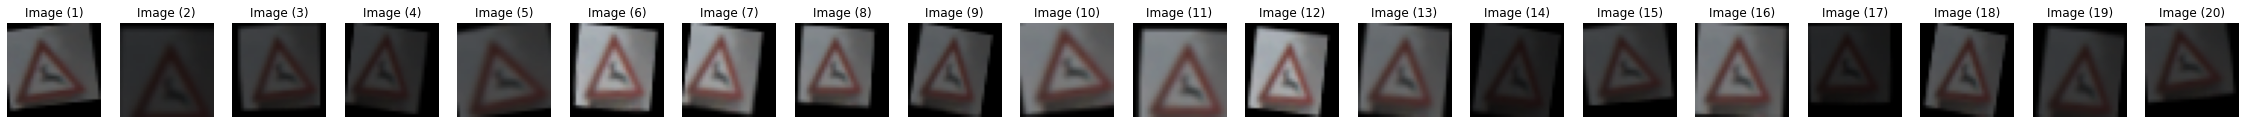

In [21]:
images = []

for i in range(0, 20):
  images.append(transform_image(X_train[555],10,5,5,brightness=1))

show_images(images)

In [25]:
# for _class, count in zip(_classes, counts):
#   new_images = []
#   new_classes = []
  
#   if count < 1000:
#     y_train_length = y_train.shape[0]
#     index = 0
    
#     for i in range(0, 1000-count):
#       while y_train[index] != _class:
#         index = random.randint(0, y_train_length-1)
#       new_images.append(transform_image(X_train[index],10,5,5,brightness=1))
#       new_classes.append(_class)
      
#     X_train = np.concatenate((X_train, np.array(new_images)))
#     y_train = np.concatenate((y_train, np.array(new_classes)))
    
# _classes, counts = np.unique(y_train, return_counts=True)

# plot_distribution_chart(_classes, counts, 'Classes', '# Training Examples', 0.7, 'blue')

In [23]:
#comprobar las dimensiones TAMAÑo

n_train = X_train.shape[0]

print("Number of training examples =", n_train)

Number of training examples = 34799


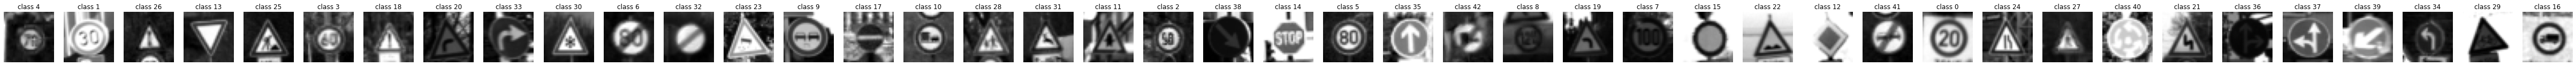

In [26]:
#convitiendo la imagen en blanco y negro
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

# check grayscale images
select_random_images_by_classes(X_train_gray.squeeze(), y_train, n_train)

In [27]:
X_train_gray -= np.mean(X_train_gray)

X_test_gray -= np.mean(X_test_gray)

X_train = X_train_gray

X_test = X_test_gray

In [28]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
X_train, y_train = shuffle(X_train, y_train)

In [29]:
X_trainn = X_train[:] / 255
X_testt = X_validation[:] / 255
y_trainn = y_train[:].astype(np.int)
y_testt = y_validation[:].astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

## ENTRENAMENTO Y PREDICCION

In [30]:
import torch
D_in, H, D_out = 784, 128, 5
# convertimos datos a tensores y copiamos en gpu
X_t = torch.from_numpy(X_train).float()
Y_t = torch.from_numpy(y_train).long()

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)#.to("cuda")


In [31]:
outputs = model(torch.randn(128, 784))
outputs.shape
# model.to("cuda")

torch.Size([128, 5])

In [9]:
# función de pérdida y derivada

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

In [8]:
from sklearn.metrics import accuracy_score

def evaluate(x):
    model.eval()
    y_pred = model(x)
    y_probas = softmax(y_pred)
    return torch.argmax(y_probas, axis=1)

y_pred = evaluate(torch.from_numpy(X_test).float())
accuracy_score(y_test, y_pred.cpu().numpy())

0.8206

In [11]:

criterion = torch.nn.CrossEntropyLoss() # funcion de perdida
optimizer = torch.optim.SGD(model.parameters(), lr=0.8) # optimizador desenso por el gradiente

epochs = 700
log_each = 10
l = []
model.train()
for e in range(1, epochs+1): 
    
    # forward
    y_pred = model(X_t)

    # loss
    loss = criterion(y_pred, Y_t)
    l.append(loss.item())
    
    # ponemos a cero los gradientes
    optimizer.zero_grad()

    # Backprop (calculamos todos los gradientes automáticamente)
    loss.backward()

    # update de los pesos
    optimizer.step()
    
    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")
        
# y_pred = evaluate(torch.from_numpy(X_test).float().cuda())
y_pred = evaluate(torch.from_numpy(X_test).float())
accuracy_score(y_test, y_pred.cpu().numpy())

Epoch 10/700 Loss 0.60236
Epoch 20/700 Loss 0.57064
Epoch 30/700 Loss 0.55056
Epoch 40/700 Loss 0.56507
Epoch 50/700 Loss 0.56658
Epoch 60/700 Loss 0.56233
Epoch 70/700 Loss 0.56075
Epoch 80/700 Loss 0.55677
Epoch 90/700 Loss 0.55348
Epoch 100/700 Loss 0.55423
Epoch 110/700 Loss 0.55323
Epoch 120/700 Loss 0.55224
Epoch 130/700 Loss 0.55036
Epoch 140/700 Loss 0.54900
Epoch 150/700 Loss 0.54756
Epoch 160/700 Loss 0.54675
Epoch 170/700 Loss 0.54729
Epoch 180/700 Loss 0.54607
Epoch 190/700 Loss 0.54581
Epoch 200/700 Loss 0.54486
Epoch 210/700 Loss 0.54514
Epoch 220/700 Loss 0.54339
Epoch 230/700 Loss 0.54376
Epoch 240/700 Loss 0.54345
Epoch 250/700 Loss 0.54275
Epoch 260/700 Loss 0.54203
Epoch 270/700 Loss 0.54121
Epoch 280/700 Loss 0.54087
Epoch 290/700 Loss 0.54076
Epoch 300/700 Loss 0.53991
Epoch 310/700 Loss 0.53861
Epoch 320/700 Loss 0.53897
Epoch 330/700 Loss 0.53866
Epoch 340/700 Loss 0.53834
Epoch 350/700 Loss 0.53735
Epoch 360/700 Loss 0.53733
Epoch 370/700 Loss 0.53673
Epoch 380/

0.8109